### Topic: Research on Melodic Intervals in Vocal Parts of Jingju  
Project for AMPLab Module2, *Yuxi Qiao and Betty Cortiñas*

### Research Question

In this project we aim at analyzing the most frequent melodic contours in Jingju vocal parts for sequences of three consecutive notes ocurring on the same syllable, in terms of the nature of the intervals between them, namely, interval class and direction.  
The idea is to count the intervals formed by three consecutive notes in the vocal part within each syllable.  
Dataset: [Jingju Music Scores Collection](https://zenodo.org/records/3233843)

In [ ]:
from music21 import *
import matplotlib.pyplot as plt
import os

# Path to the folder that contains the musicXML Jingju scores
datasetPath = 'Jingju Scores Dataset/MusicXML'

# Path to the .csv files with data about scores and lines
scoresDataFile = 'Jingju Scores Dataset/MuseScore/scores_data.csv'
linesDataFile = 'Jingju Scores Dataset/MuseScore/lines_data.csv'

### Preliminary analysis for one music score

Step1, extract all the notes from the vocal part

In [ ]:
s = converter.parse(os.path.join(datasetPath, 'lseh-YiLunMing-WenZhaoGuan-1.xml'))

pi = s.parts[1]  # Instrumental part
pv = s.parts[0]  # Vocal part

ni = pi.flat.notes.stream()   # All notes from the instrumental part
nv = pv.flat.notes.stream()   # All notes from the vocal part
nir = pi.flat.notesAndRests.stream()   # All notes and rests from the instrumental part
nvr = pv.flat.notesAndRests.stream()   # All notes and rests from the vocal part

print('The instrumental part contains {} notes'.format(len(ni)))
print('The instrumental part contains {} notes and rests'.format(len(nir)))
print('The vocal part contains {} notes'.format(len(nv)))
print('The vocal part contains {} notes and rests'.format(len(nvr)))

The instrumental part contains 2905 notes
The instrumental part contains 3006 notes and rests
The vocal part contains 1175 notes
The vocal part contains 1510 notes and rests


Step2, count all the intervals with 3 notes within each syllable, without rests in the middle.

In [ ]:
intervals = {}

for x in nvr[:-2]:
    if (x.isNote and (not x.duration.isGrace) and
        x.next().isNote and (not x.next().lyric) and (not x.next().duration.isGrace) and
        x.next().next().isNote and (not x.next().next().lyric) and (not x.next().next().duration.isGrace)):

        itv1 = interval.Interval(x, x.next())
        itv2 = interval.Interval(x.next(), x.next().next())

        if itv1.name != "P1" and itv2.name != "P1":
            itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
            intervals[itv_name] = intervals.get(itv_name, 0) + 1

In [ ]:
intervals

{'AM2_AM2': 13,
 'AM2_AP4': 2,
 'AM2_Am2': 3,
 'AM2_Am3': 12,
 'AM2_DM2': 30,
 'AM2_DM3': 5,
 'AM2_DP4': 1,
 'AM2_Dm3': 3,
 'AM3_Am3': 1,
 'AM3_DM2': 3,
 'AM3_DP4': 1,
 'AP4_AM2': 2,
 'AP4_Dm3': 7,
 'AP5_DM2': 4,
 'AP5_Dm3': 9,
 'Am2_AM2': 1,
 'Am2_Dm2': 3,
 'Am3_AM2': 14,
 'Am3_AM3': 1,
 'Am3_DP4': 4,
 'Am3_Dm2': 3,
 'Am3_Dm3': 16,
 'Am3_Dm6': 4,
 'Am6_Dm3': 3,
 'DM2_AM2': 32,
 'DM2_AM3': 4,
 'DM2_AP4': 4,
 'DM2_AP5': 9,
 'DM2_DM2': 39,
 'DM2_DM3': 1,
 'DM2_DP4': 5,
 'DM2_Dm2': 3,
 'DM2_Dm3': 10,
 'DM3_AM2': 9,
 'DM3_Dm2': 1,
 'DM3_Dm3': 1,
 'DP4_AM2': 4,
 'DP4_AP4': 1,
 'DP4_Am3': 13,
 'DP4_DM2': 4,
 'Dm2_Am3': 2,
 'Dm2_DM2': 4,
 'Dm3_AP4': 2,
 'Dm3_AP5': 5,
 'Dm3_Am3': 21,
 'Dm3_Am6': 2,
 'Dm3_DM2': 26,
 'Dm3_DP4': 2,
 'Dm6_Am3': 4,
 'Dm6_DM2': 1,
 'Dm7_Am3': 3}

Step3, sort the intervals by the number of times

In [ ]:
sorted_values = sorted(intervals.values(), reverse=True)
sorted_intervals = {}

for i in sorted_values:
    for k in intervals.keys():
        if intervals[k] == i:
            sorted_intervals[k] = intervals[k]

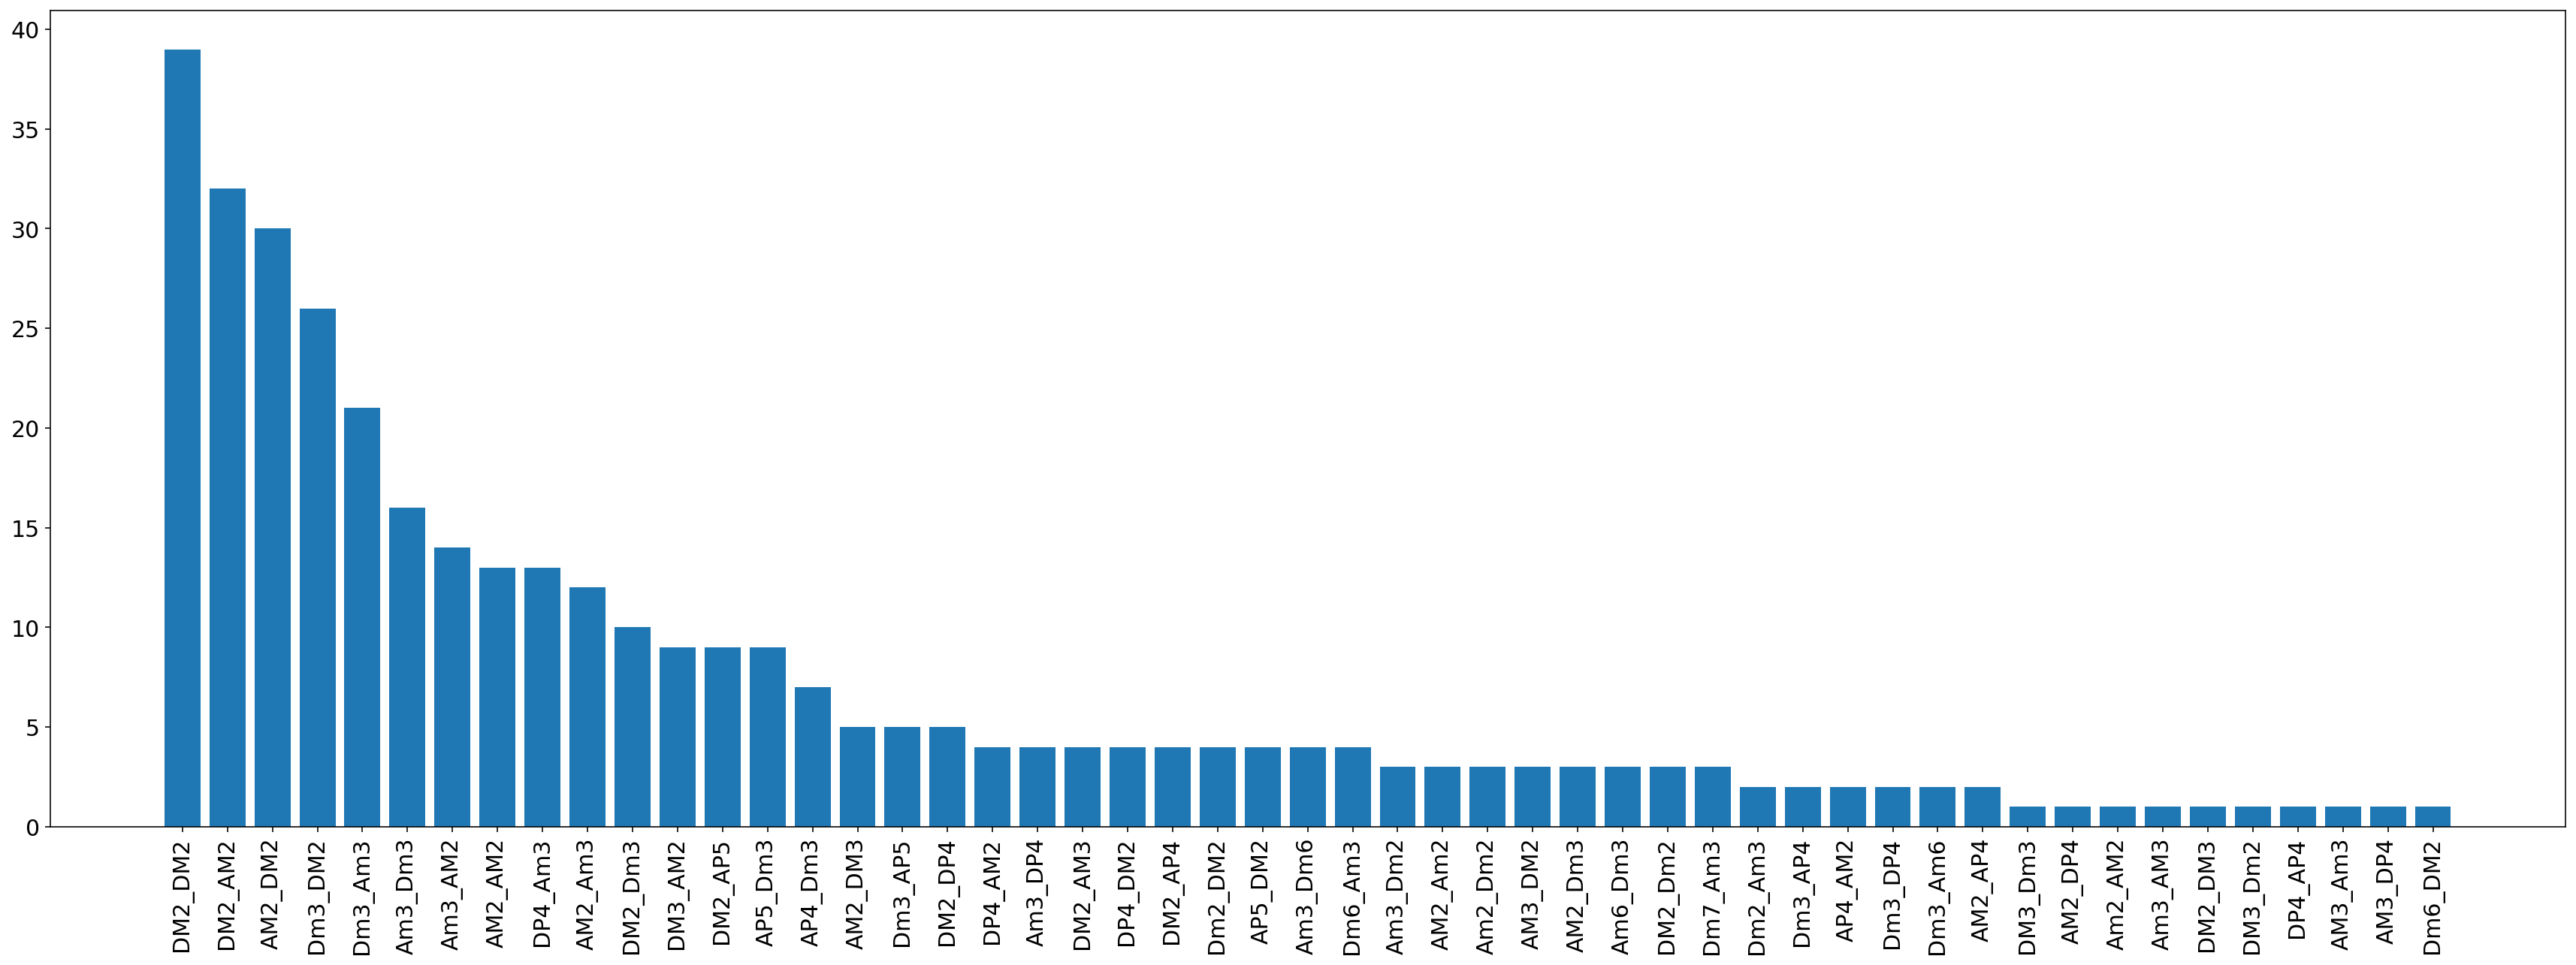

In [ ]:
# plot
xTicks = sorted_intervals.keys()
yValues = sorted_intervals.values()

plt.figure(figsize=(30,10))
plt.bar(list(xTicks), list(yValues))
plt.xticks(list(xTicks), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
print(list(sorted_intervals.keys())[0])

DM2_DM2


In [ ]:
for x in nvr[:-2]:
    if (x.isNote and (not x.duration.isGrace) and
        x.next().isNote and (not x.next().lyric) and (not x.next().duration.isGrace) and
        x.next().next().isNote and (not x.next().next().lyric) and (not x.next().next().duration.isGrace)):

        itv1 = interval.Interval(x, x.next())
        itv2 = interval.Interval(x.next(), x.next().next())

        if itv1.name != "P1" and itv2.name != "P1":
            itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
            if itv_name == list(sorted_intervals.keys())[0]:
                itv1.noteStart.style.color = 'red'
                itv1.noteEnd.style.color = 'red'
                itv2.noteEnd.style.color = 'red'

nvr.show()

### Analysis for all Jingju scores

Step1&2, extract all the notes from the vocal part, count all the intervals with 3 notes within each syllable without rests in the middle.

In [ ]:
allScores = os.listdir(datasetPath)
intervals = {}

for score in allScores:
    print('Parsing', score)
    s = converter.parse(os.path.join(datasetPath, score))

    # Find out which parts are vocal and which instrumental
    vocalParts = []  # Some scores have two vocal parts

    for p in s.parts:
        nn = p.flat.notesAndRests.stream()
        if len(nn) > 0: # There are few scores with an empty part
            i = 0
            n = nn[i]
            # Sometimes the vocal part starts with grace notes,
            # but lyrics are only attached to main notes
            while n.quarterLength == 0:
                i += 1
                n = nn[i]
            if n.lyric:
                vocalParts.append(p)

    for pv in vocalParts:
        nvr = pv.flat.notesAndRests.stream() # All notes and rests from the vocal part

        for x in nvr[:-2]:
            if (x.isNote and (not x.duration.isGrace) and
                x.next().isNote and (not x.next().lyric) and (not x.next().duration.isGrace) and
                x.next().next().isNote and (not x.next().next().lyric) and (not x.next().next().duration.isGrace)):

                itv1 = interval.Interval(x, x.next())
                itv2 = interval.Interval(x.next(), x.next().next())

                if itv1.name != "P1" and itv2.name != "P1":
                    itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
                    intervals[itv_name] = intervals.get(itv_name, 0) + 1

Parsing daeh-CanQiQi-WuLongZuo.xml
Parsing daeh-LiYanFei-DaBaoGuo.xml
Parsing daeh-LiYanFei-ErJinGong.xml
Parsing daeh-NaRiFeng-YuanXiaoMi.xml
Parsing daeh-NuZiYou-TouJunBieYao.xml
Parsing daeh-SunShangXiang-BieHuangGong.xml
Parsing daeh-TanHongYan-HuoXiaoYu.xml
Parsing daeh-WangChunE-SanNiangJiaoZi.xml
Parsing daeh-WeiKaiYan-DouEYuan.musicxml
Parsing daeh-WuDuanQiao-BiYuZan.xml
Parsing daeh-XiaoNuCai-SanNiangJiaoZi.xml
Parsing daeh-YangYuHuan-TaiZheWaiZhuan.musicxml
Parsing daeh-YiShaShi-SuoLingNang.musicxml
Parsing daeh-ZaoBuXing-HeHouMaDian.xml
Parsing daeh-ZiNaRi-ErJinGong.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-1.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-2.xml
Parsing daeh-ZuoChunGui-XiShi.xml
Parsing daeh-ZuoRiGong-TaiZhenWaiChuan.xml
Parsing danbz-BeiJiuChan-ChunGuiMeng.musicxml
Parsing danbz-KanDaWang-BaWangBieJi.musicxml
Parsing daspd-DuShouKong-WangJiangTing.musicxml
Parsing daspd-HaiDaoBing-GuiFeiZuiJiu.musicxml
Parsing daxp-ChenSanLiang-ChenSanLiangPaTang.xml
Parsing daxp-ChunQiu

Step3, sort the intervals by the number of times

In [ ]:
sorted_values = sorted(intervals.values(), reverse=True)
sorted_intervals = {}

for i in sorted_values:
    for k in intervals.keys():
        if intervals[k] == i:
            sorted_intervals[k] = intervals[k]

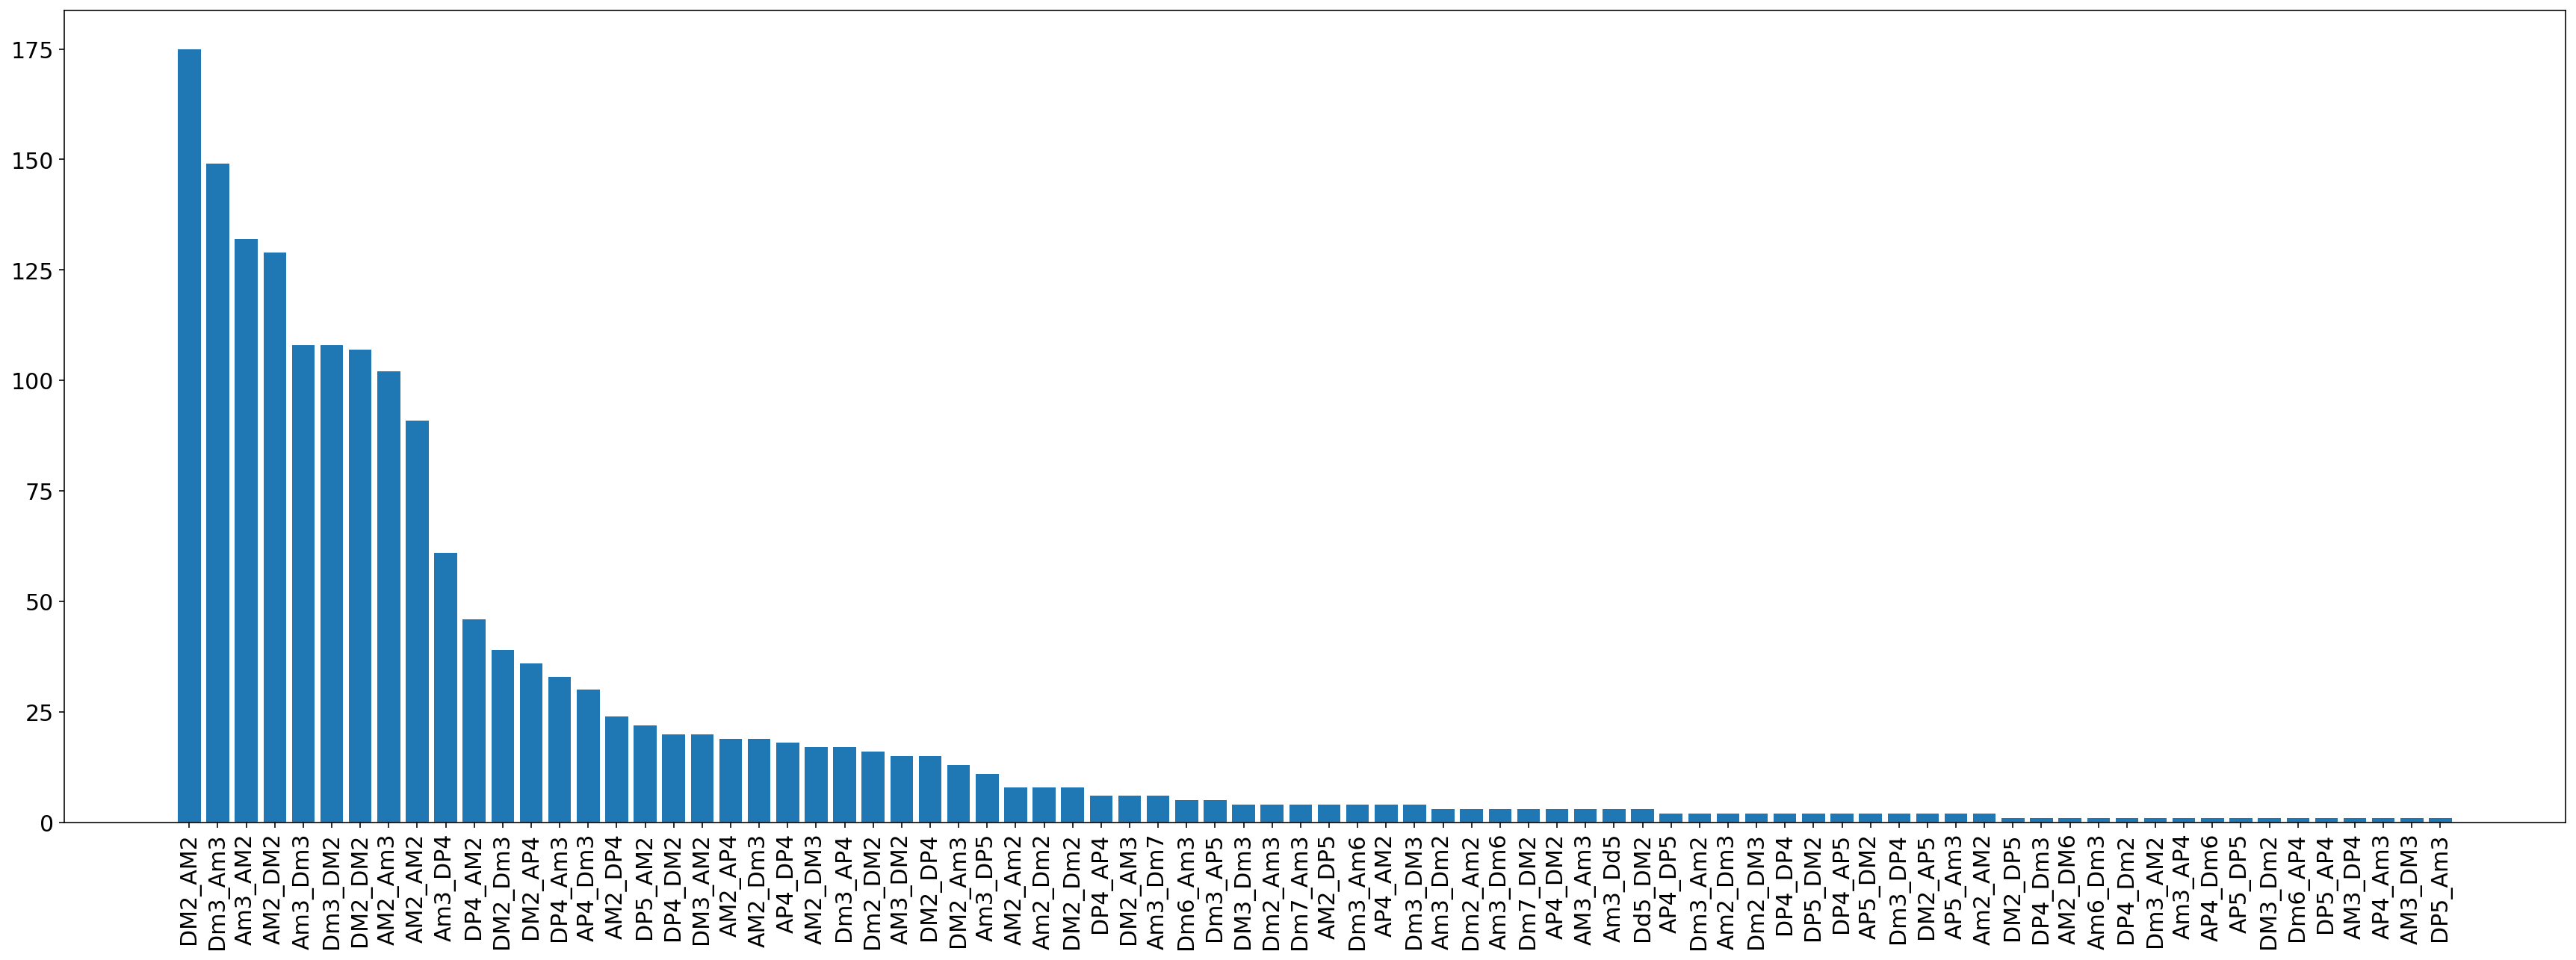

In [ ]:
xTicks = sorted_intervals.keys()
yValues = sorted_intervals.values()

plt.figure(figsize=(30,10))
plt.bar(list(xTicks), list(yValues))
plt.xticks(list(xTicks), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Display the 5 more frequent 3-note motives

In [ ]:
print(list(sorted_intervals.keys())[0:5])

['DM2_AM2', 'Dm3_Am3', 'Am3_AM2', 'AM2_DM2', 'Am3_Dm3']


### Analysis by Shengqiang

In [ ]:
import pandas as pd

scores_data = pd.read_csv(scoresDataFile)
scores_data.set_index("File name", inplace=True)
scores_data.head()

,Work,Role type,Shengqiang,Banshi,Accompaniment,Source,MBID
File name,,,,,,,
daeh-CanQiQi-WuLongZuo,“惨凄凄唤苍天天不应向”——《五龙祚》（李三娘）,dan,erhuang,manban,yes,曹宝荣，编著《京剧唱腔板式解读·上册》北京：人民音乐出版社，2010；第64-66页,--
daeh-LiYanFei-DaBaoGuo,“李艳妃设早朝龙书案下”——《大保国》（李艳妃）,dan,erhuang,manban,no,张正治，编者。《京剧传统戏皮黄唱腔结构分析》。北京：人民音乐出版社，1992；第151-155页,--
daeh-LiYanFei-ErJinGong,“李艳妃坐昭阳自思自想”——《二进宫》（李艳妃）,dan,erhuang,zhongsanyan,no,刘吉典《京剧音乐概论》北京：人民音乐出版社，1981；第228-232页,368b64ec-8dc6-4751-99ef-b0ae815dca4d
daeh-NaRiFeng-YuanXiaoMi,“那日风波平地起”——《元宵谜》（吕昭华）,dan,erhuang,yuanban,no,刘吉典《京剧音乐概论》北京：人民音乐出版社，1981；第187-190页,--
daeh-NuZiYou-TouJunBieYao,“奴自幼在闺阁娇生惯养”——《投军别窑》（王宝钏）,dan,erhuang,manban,no,张正治，编者。《京剧传统戏皮黄唱腔结构分析》。北京：人民音乐出版社，1992；第144-146页,--


In [ ]:
intervals_erhuang = {}
intervals_xipi = {}

for score in allScores:
    print('Parsing', score)
    s = converter.parse(os.path.join(datasetPath, score))

    # Find out which parts are vocal and which instrumental
    vocalParts = []  # Some scores have two vocal parts

    for p in s.parts:
        nn = p.flat.notesAndRests.stream()
        if len(nn) > 0: # There are few scores with an empty part
            i = 0
            n = nn[i]
            # Sometimes the vocal part starts with grace notes,
            # but lyrics are only attached to main notes
            while n.quarterLength == 0:
                i += 1
                n = nn[i]
            if n.lyric:
                vocalParts.append(p)

    for pv in vocalParts:
        nvr = pv.flat.notesAndRests.stream() # All notes and rests from the vocal part

        for x in nvr[:-2]:
            if (x.isNote and (not x.duration.isGrace) and
                x.next().isNote and (not x.next().lyric) and (not x.next().duration.isGrace) and
                x.next().next().isNote and (not x.next().next().lyric) and (not x.next().next().duration.isGrace)):

                itv1 = interval.Interval(x, x.next())
                itv2 = interval.Interval(x.next(), x.next().next())

                if itv1.name != "P1" and itv2.name != "P1":
                    itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
                    if scores_data.loc[score.split('.')[0]]["Shengqiang"] == "erhuang":
                        intervals_erhuang[itv_name] = intervals_erhuang.get(itv_name, 0) + 1
                    elif scores_data.loc[score.split('.')[0]]["Shengqiang"] == "xipi":
                        intervals_xipi[itv_name] = intervals_xipi.get(itv_name, 0) + 1

Parsing daeh-CanQiQi-WuLongZuo.xml
Parsing daeh-LiYanFei-DaBaoGuo.xml
Parsing daeh-LiYanFei-ErJinGong.xml
Parsing daeh-NaRiFeng-YuanXiaoMi.xml
Parsing daeh-NuZiYou-TouJunBieYao.xml
Parsing daeh-SunShangXiang-BieHuangGong.xml
Parsing daeh-TanHongYan-HuoXiaoYu.xml
Parsing daeh-WangChunE-SanNiangJiaoZi.xml
Parsing daeh-WeiKaiYan-DouEYuan.musicxml
Parsing daeh-WuDuanQiao-BiYuZan.xml
Parsing daeh-XiaoNuCai-SanNiangJiaoZi.xml
Parsing daeh-YangYuHuan-TaiZheWaiZhuan.musicxml
Parsing daeh-YiShaShi-SuoLingNang.musicxml
Parsing daeh-ZaoBuXing-HeHouMaDian.xml
Parsing daeh-ZiNaRi-ErJinGong.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-1.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-2.xml
Parsing daeh-ZuoChunGui-XiShi.xml
Parsing daeh-ZuoRiGong-TaiZhenWaiChuan.xml
Parsing danbz-BeiJiuChan-ChunGuiMeng.musicxml
Parsing danbz-KanDaWang-BaWangBieJi.musicxml
Parsing daspd-DuShouKong-WangJiangTing.musicxml
Parsing daspd-HaiDaoBing-GuiFeiZuiJiu.musicxml
Parsing daxp-ChenSanLiang-ChenSanLiangPaTang.xml
Parsing daxp-ChunQiu

In [ ]:
sorted_values_erhuang = sorted(intervals_erhuang.values(), reverse=True)
sorted_intervals_erhuang = {}

for i in sorted_values_erhuang:
    for k in intervals_erhuang.keys():
        if intervals_erhuang[k] == i:
            sorted_intervals_erhuang[k] = intervals_erhuang[k]


sorted_values_xipi = sorted(intervals_xipi.values(), reverse=True)
sorted_intervals_xipi = {}

for i in sorted_values_xipi:
    for k in intervals_xipi.keys():
        if intervals_xipi[k] == i:
            sorted_intervals_xipi[k] = intervals_xipi[k]

In [ ]:
xTicks_erhuang = sorted_intervals_erhuang.keys()
yValues_erhuang = sorted_intervals_erhuang.values()

xTicks_xipi = sorted_intervals_xipi.keys()
yValues_xipi = sorted_intervals_xipi.values()

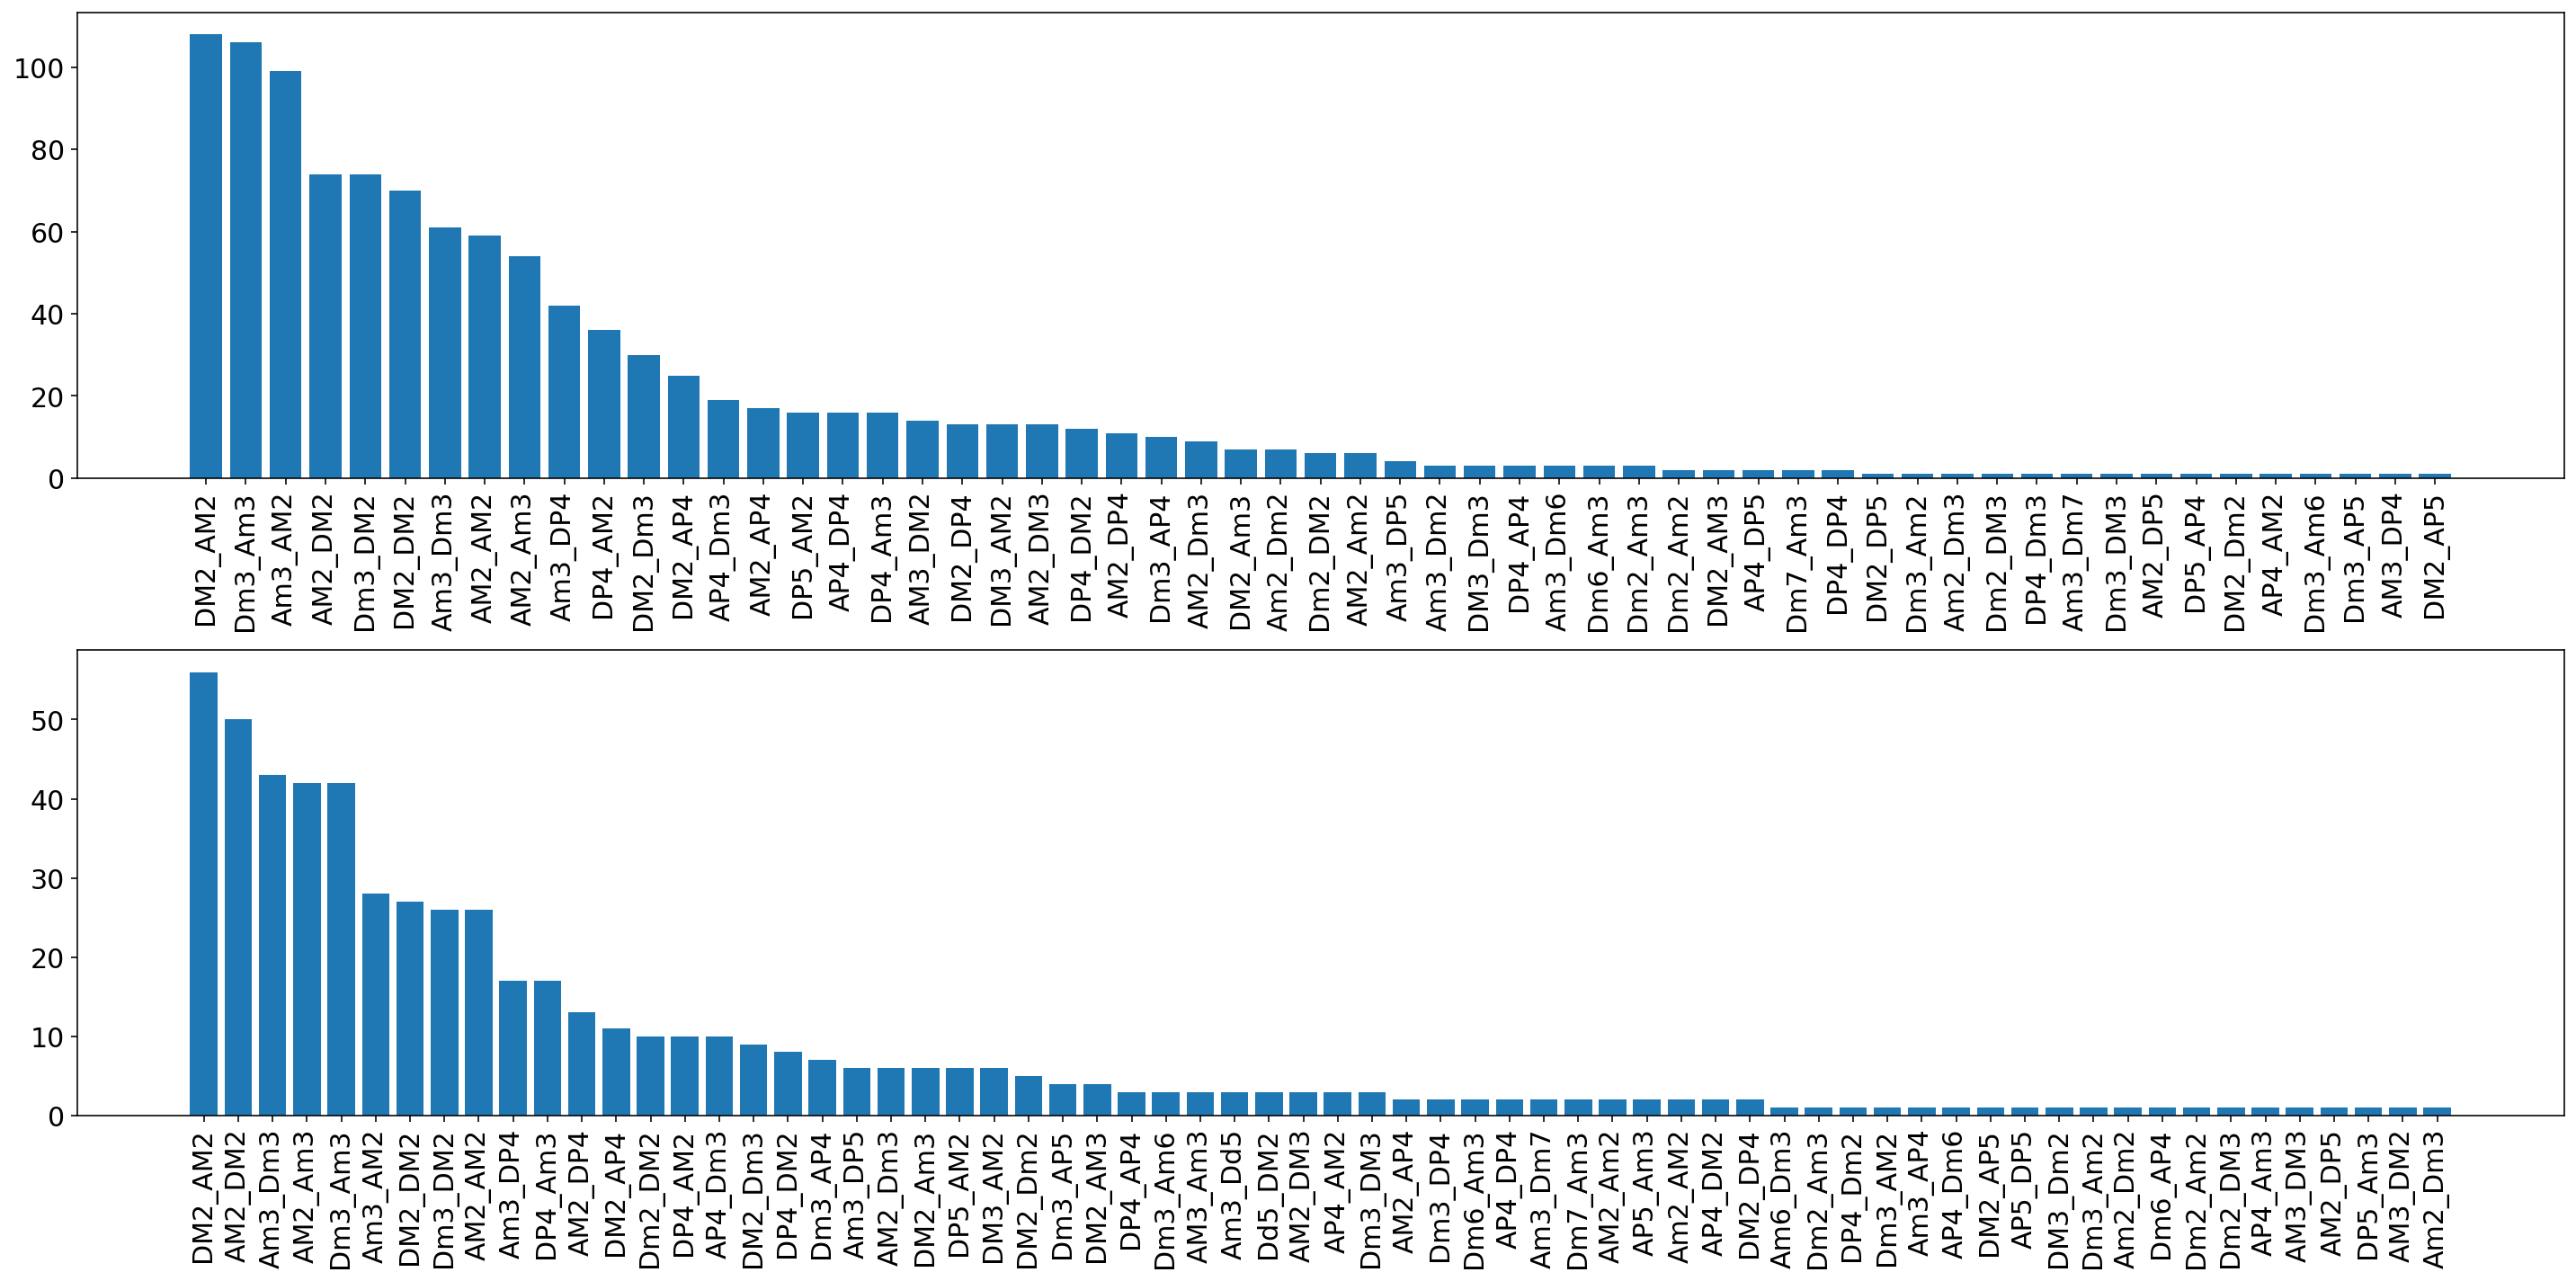

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.bar(list(xTicks_erhuang), list(yValues_erhuang))
plt.xticks(list(xTicks_erhuang), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,1,2)
plt.bar(list(xTicks_xipi), list(yValues_xipi))
plt.xticks(list(xTicks_xipi), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

### Analysis by Shengqiang and role type

In [ ]:
lines_data = pd.read_csv(linesDataFile)
lines_data.head()

,File name,Role type,Shengqiang,Banshi,Couplet line,Lyrics line,Start,End,Tones,1 section,Unnamed: 10,Unnamed: 11,2 section,Unnamed: 13,Unnamed: 14,3 section,Unnamed: 16,Unnamed: 17
0,daeh-CanQiQi-WuLongZuo.xml,dan,erhuang,manban,s1,惨凄凄唤苍天天不应响，,12,65,3114111243,惨凄凄,12,16,唤苍天,20.0,29,天不应响，,40.0,65
1,daeh-CanQiQi-WuLongZuo.xml,dan,erhuang,manban,x,叹红颜多薄命父母双亡。,84,121,4221244312,叹红颜,84,91,多薄命,93.0,95.5,父母双亡。,96.0,121
2,daeh-CanQiQi-WuLongZuo.xml,dan,erhuang,manban,s1,千金休哪曾受磨房景况，,136,201,1113244234,千金休,136,141,哪曾受,144.0,153,磨房景况，,164.0,201
3,daeh-CanQiQi-WuLongZuo.xml,dan,erhuang,manban,x,担几肩头晕转体若筛糠。,236,261,1312133411,担几肩,236,243,头晕转,245.0,247.5,体若筛糠。,248.0,261
4,daeh-LiYanFei-DaBaoGuo.xml,dan,erhuang,manban,s1,李艳妃设早朝龙书案下，,0,41,3414322144,李艳妃,0,4,设早朝,8.0,16,龙书案下，,17.0,41


In [ ]:
line = lines_data.loc[lines_data['File name'] == "daeh-LiYanFei-DaBaoGuo.xml"]
for index, row in line.iterrows():
    print(row["Start"])

0
42
75
104
124
144
164
197
238
267


In [ ]:
intervals_erhuang_dan = {}
intervals_erhuang_laosheng = {}
intervals_xipi_dan = {}
intervals_xipi_laosheng = {}

for score in allScores:
    print('Parsing', score)
    s = converter.parse(os.path.join(datasetPath, score))

    # Find out which parts are vocal and which instrumental
    vocalParts = []  # Some scores have two vocal parts

    for p in s.parts:
        nn = p.flat.notesAndRests.stream()
        if len(nn) > 0: # There are few scores with an empty part
            i = 0
            n = nn[i]
            # Sometimes the vocal part starts with grace notes,
            # but lyrics are only attached to main notes
            while n.quarterLength == 0:
                i += 1
                n = nn[i]
            if n.lyric:
                vocalParts.append(p)

    for pv in vocalParts:
        nvr = pv.flat.notesAndRests.stream() # All notes and rests from the vocal part

        for x in nvr[:-2]:
            if (x.isNote and (not x.duration.isGrace) and
                x.next().isNote and (not x.next().lyric) and (not x.next().duration.isGrace) and
                x.next().next().isNote and (not x.next().next().lyric) and (not x.next().next().duration.isGrace)):

                itv1 = interval.Interval(x, x.next())
                itv2 = interval.Interval(x.next(), x.next().next())

                line = lines_data.loc[lines_data['File name'] == score]
                for index, row in line.iterrows():
                    if float(row["Start"]) <= x.offset <= float(row["End"]):
                        role_type = row["Role type"]
                        break

                if itv1.name != "P1" and itv2.name != "P1":
                    itv_name = str(itv1.direction.name[0]) + str(itv1.name) + "_" + str(itv2.direction.name[0]) + str(itv2.name)
                    if scores_data.loc[score.split('.')[0]]["Shengqiang"] == "erhuang":
                        if role_type == "dan":
                            intervals_erhuang_dan[itv_name] = intervals_erhuang_dan.get(itv_name, 0) + 1
                        elif role_type == "laosheng":
                            intervals_erhuang_laosheng[itv_name] = intervals_erhuang_laosheng.get(itv_name, 0) + 1
                    elif scores_data.loc[score.split('.')[0]]["Shengqiang"] == "xipi":
                        if role_type == "dan":
                            intervals_xipi_dan[itv_name] = intervals_xipi_dan.get(itv_name, 0) + 1
                        elif role_type == "laosheng":
                            intervals_xipi_laosheng[itv_name] = intervals_xipi_laosheng.get(itv_name, 0) + 1

Parsing daeh-CanQiQi-WuLongZuo.xml
Parsing daeh-LiYanFei-DaBaoGuo.xml
Parsing daeh-LiYanFei-ErJinGong.xml
Parsing daeh-NaRiFeng-YuanXiaoMi.xml
Parsing daeh-NuZiYou-TouJunBieYao.xml
Parsing daeh-SunShangXiang-BieHuangGong.xml
Parsing daeh-TanHongYan-HuoXiaoYu.xml
Parsing daeh-WangChunE-SanNiangJiaoZi.xml
Parsing daeh-WeiKaiYan-DouEYuan.musicxml
Parsing daeh-WuDuanQiao-BiYuZan.xml
Parsing daeh-XiaoNuCai-SanNiangJiaoZi.xml
Parsing daeh-YangYuHuan-TaiZheWaiZhuan.musicxml
Parsing daeh-YiShaShi-SuoLingNang.musicxml
Parsing daeh-ZaoBuXing-HeHouMaDian.xml
Parsing daeh-ZiNaRi-ErJinGong.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-1.xml
Parsing daeh-ZiNaRi-ZhuangYuanMei-2.xml
Parsing daeh-ZuoChunGui-XiShi.xml
Parsing daeh-ZuoRiGong-TaiZhenWaiChuan.xml
Parsing danbz-BeiJiuChan-ChunGuiMeng.musicxml
Parsing danbz-KanDaWang-BaWangBieJi.musicxml
Parsing daspd-DuShouKong-WangJiangTing.musicxml
Parsing daspd-HaiDaoBing-GuiFeiZuiJiu.musicxml
Parsing daxp-ChenSanLiang-ChenSanLiangPaTang.xml
Parsing daxp-ChunQiu

In [ ]:
sorted_values_erhuang_dan = sorted(intervals_erhuang_dan.values(), reverse=True)
sorted_intervals_erhuang_dan = {}
for i in sorted_values_erhuang_dan:
    for k in intervals_erhuang_dan.keys():
        if intervals_erhuang_dan[k] == i:
            sorted_intervals_erhuang_dan[k] = intervals_erhuang_dan[k]

sorted_values_erhuang_laosheng = sorted(intervals_erhuang_laosheng.values(), reverse=True)
sorted_intervals_erhuang_laosheng = {}
for i in sorted_values_erhuang_laosheng:
    for k in intervals_erhuang_laosheng.keys():
        if intervals_erhuang_laosheng[k] == i:
            sorted_intervals_erhuang_laosheng[k] = intervals_erhuang_laosheng[k]

sorted_values_xipi_dan = sorted(intervals_xipi_dan.values(), reverse=True)
sorted_intervals_xipi_dan = {}
for i in sorted_values_xipi_dan:
    for k in intervals_xipi_dan.keys():
        if intervals_xipi_dan[k] == i:
            sorted_intervals_xipi_dan[k] = intervals_xipi_dan[k]

sorted_values_xipi_laosheng = sorted(intervals_xipi_laosheng.values(), reverse=True)
sorted_intervals_xipi_laosheng = {}
for i in sorted_values_xipi_laosheng:
    for k in intervals_xipi_laosheng.keys():
        if intervals_xipi_laosheng[k] == i:
            sorted_intervals_xipi_laosheng[k] = intervals_xipi_laosheng[k]

In [ ]:
xTicks_erhuang_dan = sorted_intervals_erhuang_dan.keys()
yValues_erhuang_dan = sorted_intervals_erhuang_dan.values()

xTicks_erhuang_laosheng = sorted_intervals_erhuang_laosheng.keys()
yValues_erhuang_laosheng = sorted_intervals_erhuang_laosheng.values()

xTicks_xipi_dan = sorted_intervals_xipi_dan.keys()
yValues_xipi_dan = sorted_intervals_xipi_dan.values()

xTicks_xipi_laosheng = sorted_intervals_xipi_laosheng.keys()
yValues_xipi_laosheng = sorted_intervals_xipi_laosheng.values()

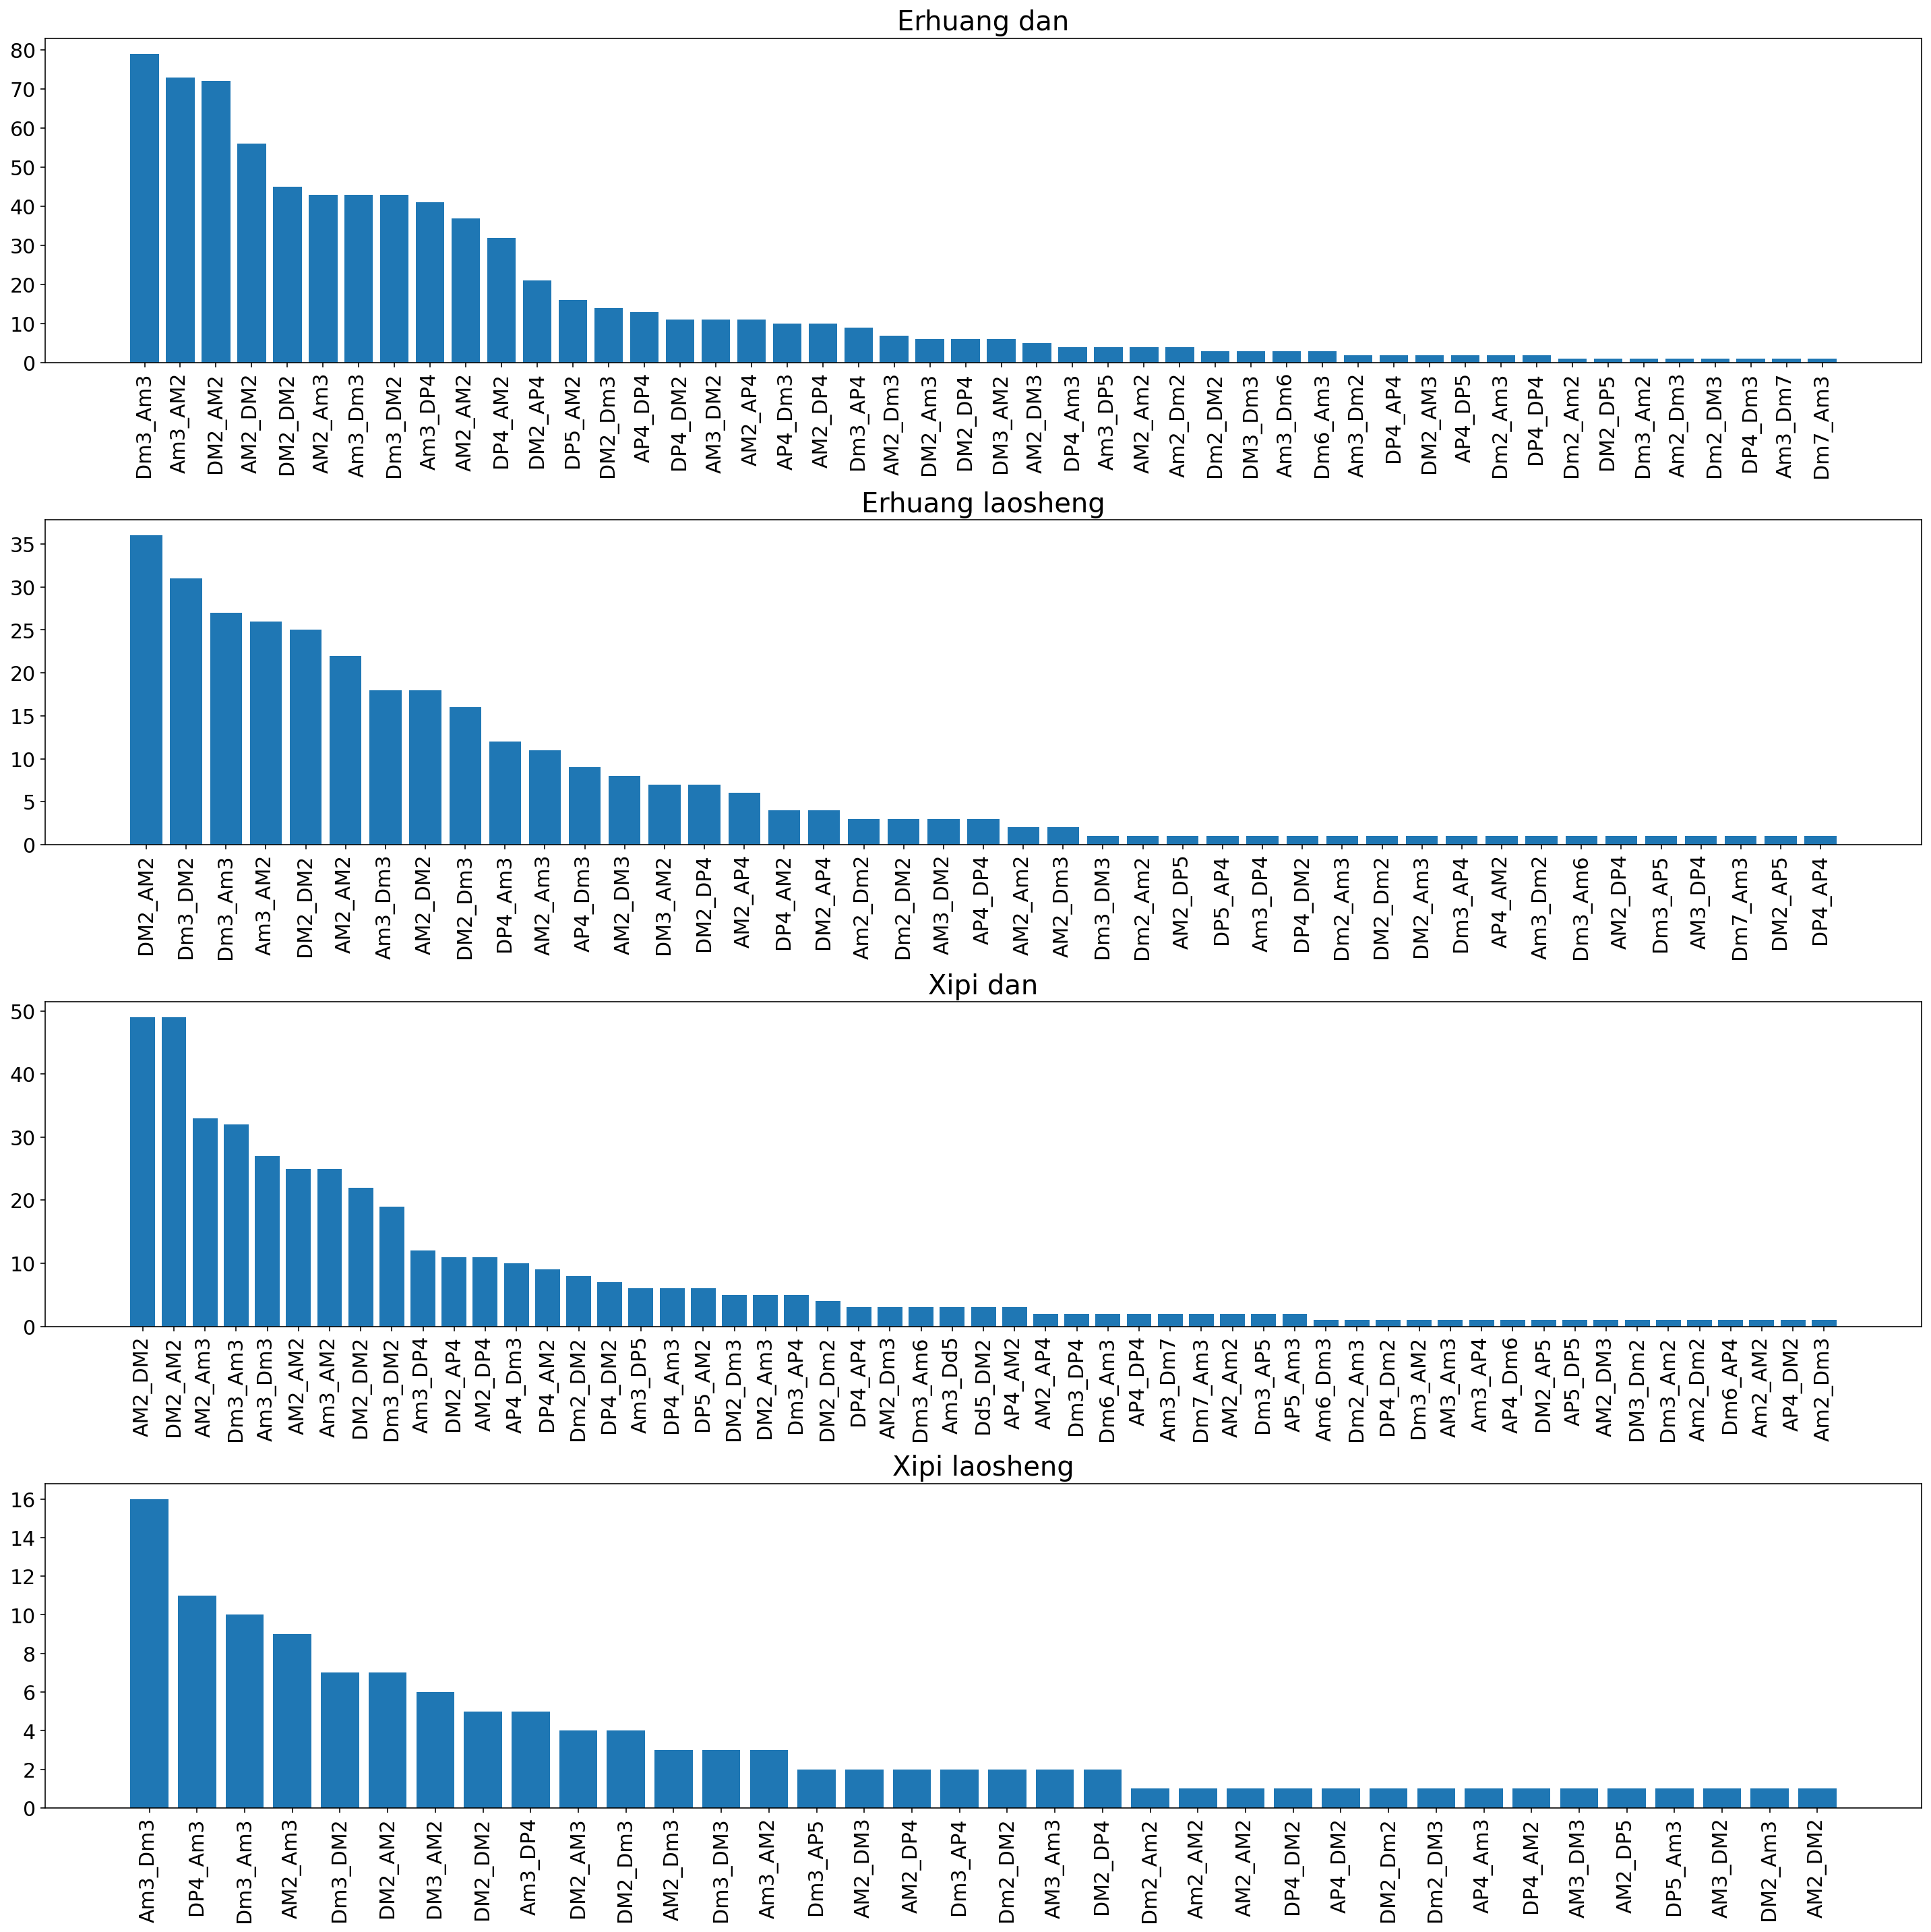

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
plt.bar(list(xTicks_erhuang_dan), list(yValues_erhuang_dan))
plt.xticks(list(xTicks_erhuang_dan), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.title("Erhuang dan", fontsize=20)

plt.subplot(4,1,2)
plt.bar(list(xTicks_erhuang_laosheng), list(yValues_erhuang_laosheng))
plt.xticks(list(xTicks_erhuang_laosheng), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.title("Erhuang laosheng", fontsize=20)

plt.subplot(4,1,3)
plt.bar(list(xTicks_xipi_dan), list(yValues_xipi_dan))
plt.xticks(list(xTicks_xipi_dan), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.title("Xipi dan", fontsize=20)

plt.subplot(4,1,4)
plt.bar(list(xTicks_xipi_laosheng), list(yValues_xipi_laosheng))
plt.xticks(list(xTicks_xipi_laosheng), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.title("Xipi laosheng", fontsize=20)

plt.tight_layout()
plt.show()